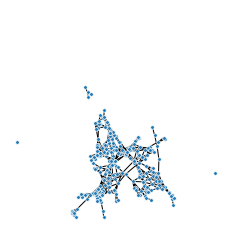

In [1]:
import kmapper as km
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import Isomap
from sklearn.preprocessing import MinMaxScaler
newsgroups = fetch_20newsgroups(subset='train')
X, y, target_names = np.array(newsgroups.data), np.array(newsgroups.target), np.array(newsgroups.target_names)
mapper = km.KeplerMapper(verbose=0)
projected_X = mapper.fit_transform(X,projection=[TfidfVectorizer(analyzer="char",ngram_range=(1,6),max_df=0.83,min_df=0.05),
                TruncatedSVD(n_components=100,random_state=1729),Isomap(n_components=2,n_jobs=-1)],scaler=[None, None, MinMaxScaler()])
from sklearn import cluster
graph = mapper.map(projected_X,clusterer=cluster.AgglomerativeClustering(n_clusters=3,linkage="complete",affinity="cosine"),overlap_perc=0.33)
vec = TfidfVectorizer(analyzer="word",strip_accents="unicode",stop_words="english",ngram_range=(1,3),max_df=0.97,min_df=0.02)
interpretable_inverse_X = vec.fit_transform(X).toarray()
interpretable_inverse_X_names = vec.get_feature_names()
html = mapper.visualize(graph,
                        path_html="newsgroups20.html",
                        title="Newsgroups20: Latent Semantic Char-gram Analysis with Isometric Embedding",
                        custom_tooltips=np.array([target_names[ys] for ys in y]),
                        color_function=y)
from kmapper import jupyter
#jupyter.display("newsgroups20.html")
km.draw_matplotlib(graph)
import matplotlib.pyplot as plt
plt.show()

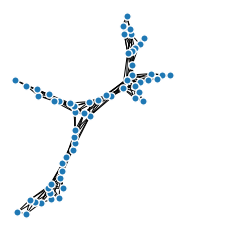

In [2]:
import sklearn
import kmapper as km
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import PIL
from sklearn.decomposition import PCA
from ripser import lower_star_img
cells_original = plt.imread("cells.jpg")
cells_grey = np.asarray(PIL.Image.fromarray(cells_original).convert('L'))
cars_original = plt.imread("cars.jpg")
cars_grey = np.asarray(PIL.Image.fromarray(cars_original).convert('L'))
catdog_original = plt.imread("catdog.jpg")
catdog_grey = np.asarray(PIL.Image.fromarray(catdog_original).convert('L'))
shapes_original = plt.imread("shapes.jpg")
shapes_grey = np.asarray(PIL.Image.fromarray(shapes_original).convert('L'))
hand_original = plt.imread("hand.jpg")
hand_grey = np.asarray(PIL.Image.fromarray(hand_original).convert('L'))
mapper = km.KeplerMapper(verbose=0)

smoothed = ndimage.uniform_filter(hand_grey.astype(np.float64), size=5)
import umap
from sklearn.decomposition import PCA
lens = mapper.fit_transform(smoothed, projection = 'knn_distance_10', scaler = None)
#default scalar is MinMaxScalar() and default projection is sum default distance_matrix = False
#eps in DBSCAN represents the maximum distance between 2 samples to be considered as neighbors.
#min_samples number of samples/points in the neighborhood to be considered a core point.
graph = mapper.map(lens,
                   smoothed,
                   clusterer=sklearn.cluster.DBSCAN(eps=0.2, min_samples=1, metric = 'cosine'),
                   cover=km.Cover(n_cubes=25, perc_overlap=0.8), remove_duplicate_nodes=True)
#perc_overlap is amount of overlap between adjacent cubes.
#this graph is a simplicial complex
mapper.visualize(graph,
                 path_html="smoothed.html")
#jupyter.display("smoothed.html")
km.draw_matplotlib(graph)

import matplotlib.pyplot as plt
plt.show()

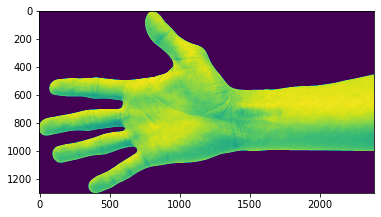

In [3]:
plt.imshow(smoothed)
plt.show()

In [4]:
mapper = km.KeplerMapper(verbose=1)
lens = mapper.fit_transform(cells_grey)
smoothed = ndimage.uniform_filter(cells_grey.astype(np.float64), size=5)
graph = mapper.map(lens,
                   cells_grey,
                   clusterer=sklearn.cluster.DBSCAN(eps=0.1, min_samples=1),
                   cover=km.Cover(n_cubes=10, perc_overlap=0.1))
mapper.visualize(graph,
                 path_html="cells.html")
#km.draw_matplotlib(graph)
#jupyter.display("cells.html")
import matplotlib.pyplot as plt
#plt.show()

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: sum
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (147, 226)

..Projecting data using: sum

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))

Mapping on data shaped (147, 226) using lens shaped (147, 1)

Creating 10 hypercubes.

Created 13 edges and 160 nodes in 0:00:00.014694.
Wrote visualization to: cells.html


In [ ]:
mapper = km.KeplerMapper(verbose=1)
#smoothed = ndimage.uniform_filter(hand_grey.astype(np.float64), size=5)
#smoothed = smoothed[0::5,0::10]

lens = mapper.fit_transform(smoothed, projection=np.arange(1))
#smoothed = ndimage.uniform_filter(hand_grey.astype(np.float64), size=5)
graph = mapper.map(lens,
                   smoothed,
                   clusterer=sklearn.cluster.DBSCAN(eps=0.2, min_samples=1,metric = 'cosine', n_jobs=-1),
                   cover=km.Cover(n_cubes=50, perc_overlap=0.2))
mapper.visualize(graph,
                 path_html="hand.html")
km.draw_matplotlib(graph)
#jupyter.display("hand.html")
import matplotlib.pyplot as plt
plt.show()

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (65, 60)

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))

Mapping on data shaped (65, 60) using lens shaped (65, 60)



(1299, 598)


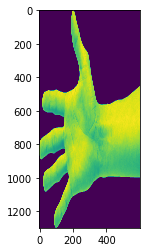

In [3]:
smoothed=smoothed[:,::2]
print (smoothed.shape)
#smoothed = np.reshape(smoothed, (-1,1195))
plt.imshow(smoothed)

In [7]:
from kmapper import jupyter

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


Output graph examples to html


/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


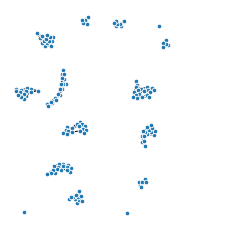

In [493]:
import io
import sys
import base64
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets
import kmapper as km
try:
    from scipy.misc import toimage
except ImportError as e:
    print("imsave requires you to install pillow. Run `pip install pillow` and then try again.")    
# Load digits dat
data, labels = datasets.load_digits().data, datasets.load_digits().target
# Create images for a custom tooltip array
tooltip_s = []
for image_data in data:
    output = io.BytesIO()
    img = toimage(image_data.reshape((8, 8)))  # Data was a flat row of 64 "pixels".
    img.save(output, format="PNG")
    contents = output.getvalue()
    img_encoded = base64.b64encode(contents)
    img_tag = """<img src="data:image/png;base64,{}">""".format(img_encoded.decode('utf-8'))
    tooltip_s.append(img_tag)
    output.close()
tooltip_s = np.array(tooltip_s)  # need to make sure to feed it as a NumPy array, not a list
# Initialize to use t-SNE with 2 components (reduces data to 2 dimensions). Also note high overlap_percentage.
mapper = km.KeplerMapper(verbose=0)
# Fit and transform data
projected_data = mapper.fit_transform(data,
                                      projection=sklearn.manifold.TSNE())
# Create the graph (we cluster on the projected data and suffer projection loss)
graph = mapper.map(projected_data,
                   clusterer=sklearn.cluster.DBSCAN(eps=0.3, min_samples=15),
                   cover=km.Cover(35, 0.4))
# Create the visualizations (increased the graph_gravity for a tighter graph-look.)
print("Output graph examples to html" )
# Tooltips with image data for every cluster member
mapper.visualize(graph,
                 title="Handwritten digits Mapper",
                 path_html="digits_custom_tooltips.html",
                 color_function=labels,
                 custom_tooltips=tooltip_s)
# Tooltips with the target y-labels for every cluster member
mapper.visualize(graph,
                 title="Handwritten digits Mapper",
                 path_html="digits_ylabel_tooltips.html",
                 custom_tooltips=labels)
#jupyter.display("digits_custom_tooltips.html")
km.draw_matplotlib(graph)

import matplotlib.pyplot as plt
plt.show()

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: sum
	Distance matrices: False
	Scalers: None
..Projecting on data shaped (147, 226)

..Projecting data using: sum
Mapping on data shaped (147, 226) using lens shaped (147, 1)

Creating 25 hypercubes.
Merged 35 duplicate nodes.

Number of nodes before merger: 182; after merger: 147


Created 0 edges and 147 nodes in 0:00:00.021897.
Wrote visualization to: smoothed.html


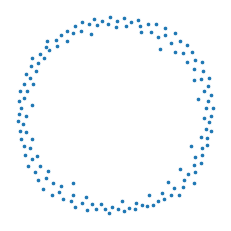

In [22]:
mapper = km.KeplerMapper(verbose=1)

smoothed = ndimage.uniform_filter(cells_grey.astype(np.float64), size=5)

lens = mapper.fit_transform(smoothed, projection = 'sum', scaler = None)
graph = mapper.map(lens,
                   smoothed,
                   clusterer=sklearn.cluster.DBSCAN(eps=0.1, min_samples=1),
                   cover=km.Cover(n_cubes=25, perc_overlap=0.2), remove_duplicate_nodes= True)
mapper.visualize(graph,
                 path_html="smoothed.html")
#jupyter.display("smoothed.html")
km.draw_matplotlib(graph)

import matplotlib.pyplot as plt
plt.show()